In [74]:
%matplotlib inline


from bs4 import BeautifulSoup
import requests

import pandas as pd
import matplotlib.pyplot as plt

data = open("dataInsta.txt", "r")
insta_user = []
for line in data:
    insta_user.append(line.replace("\r\n", ""))
len(insta_user)

408

In [52]:
page_list = []

for user in insta_user:
    page_list.append("https://www.instagram.com" + user)        
    print user.split("/")[1]


audrykth
rosananhr
prabhat6106
dendysequerpant
cipcupsilvi
rbytl_adnin
myogir
husnulhusnulhasan
sagarmulashiya15
dessymeliyana_04
frnnd.12
nyoklat_broooo
nurfitriyannii
gamishijab25
nona.biru.7547
keeviinnn._
ruthsiahaan82_
zulfr_
qirom_qhy98
dhiny_sucianti_rauf
gbysrh_29
panutanumat
imamfirmansyah99
juliusachmad
azkazkazka.ka
raniaenamaessa
amu0171
andikariady09
debby.aprilia2804
nurulrizky_lukman
ndaahhh___
ivanramadanibast
farhadshojaee2
adi_war_1997
l_kartikasari
hestinurhayati1507
jafar_zufaar
ghiyatshidayat
ramaputrawibawa
bukan_cinta1990
annisariyana
petruspandjaitan
m.wardy29
kojro_dirk
kinchspringer
bang_pj
sheetal_singh_78
dwiedj_14
budhyibrahimliu
dras1379n
alfarizi_070719
aswin223322
fuji91
liya_fbrynt
ka_maka1
irwan_yanaki01
account_blum_resmi
reshallprdna
patriciaputrie
pancagammy
akhmadfadhillahikhsan18390
afterworking
wilyamazzzt
reinhardsakaria
cut.nuraisyah.54
arsyneraa
roziogibran
bonimaring
beautysryfr__
gembel137
tdveparesh
cahyono916
riowede721
susan.adryn
ruangkr

In [ ]:
followers = []
following = []
posts = []
valid_user = []

for (raw_page, user) in zip(page_list, insta_user):
    page = requests.get(raw_page)
    print page
    if (page.status_code != 404) : #Jika request berhasil
        soup = BeautifulSoup(page.content, 'html.parser')
        page_data = soup.find('meta', {'name': 'description'})['content'].split('-')
        page_data = page_data[0].split(", ")
        
        valid_user.append(user.split("/")[1])
        for elements in page_data:
            elements = elements.split(' ')
            if elements > 0:
                if elements[1] == "Followers":
                    if elements[0][-1] == "k":
                        elements[0] = elements[0][:-1]
                        followers.append(int(elements[0].replace(".", "")) * 1000)
                    else:
                        followers.append(int(elements[0].replace(",","")))
                if elements[1] == "Following":
                    if elements[0][-1] == "k":
                        elements[0] = elements[0][:-1]
                        following.append(int(elements[0].replace(".", "")) * 1000)
                    else:
                        following.append(int(elements[0].replace(",","")))
                if elements[1] == "Posts":
                    if elements[0][-1] == "k":
                        elements[0] = elements[0][:-1]
                        posts.append(int(elements[0].replace(".", "")) * 1000)
                    else:
                        posts.append(int(elements[0].replace(",","")))
            
# print followers

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [60]:
print len(followers)

394


In [72]:
df = pd.DataFrame()
df['username'] = valid_user
df['followers'] = followers
df['following'] = following
df['posts'] = posts
df.describe()

,followers,following,posts
count,352.000000,352.000000,352.000000
mean,664.971591,418.457386,45.951705
std,1113.153803,713.093069,170.053303
min,0.000000,0.000000,0.000000
25%,64.750000,76.750000,2.000000
50%,264.000000,198.000000,9.000000
75%,761.750000,423.250000,31.250000
max,7376.000000,6877.000000,2464.000000


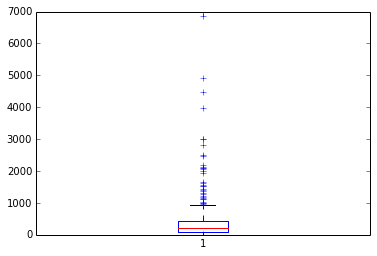

In [76]:
plt.boxplot(df['following'])
plt.show()

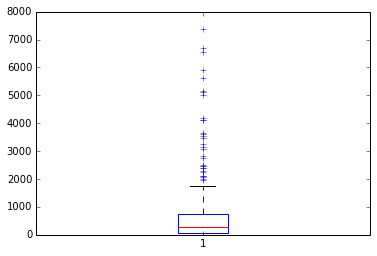

In [79]:
plt.boxplot(df['followers'])
plt.show()

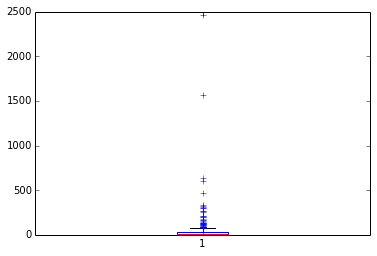

In [80]:
plt.boxplot(df['posts'])
plt.show()

0.1214557470843906


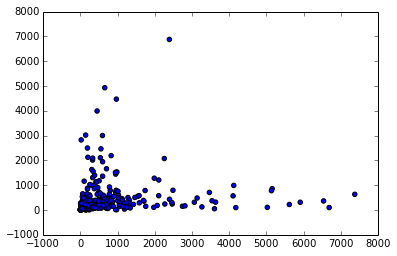

In [86]:
print df['followers'].corr(df["following"])
plt.scatter(df['followers'], df['following'])
plt.show()

0.07966093213399801


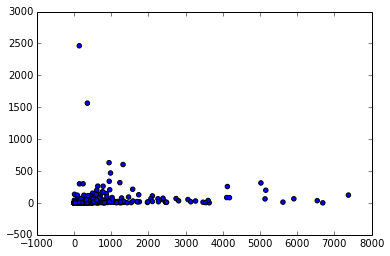

,username,followers,following,posts
59,afterworking,141,3020,2464
118,clarissaivena,358,980,1564


In [98]:
print df['followers'].corr(df["posts"])
plt.scatter(df['followers'], df['posts'])
plt.show()

df[df.posts > 1500]  

In [ ]:
plt.scatter(df[''])